# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [222]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [223]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [224]:
sinasc_raw['munResLat'].value_counts()

-8.76889     8437
-10.88205    2182
-9.90846     1729
-12.74137    1590
-11.43387    1374
-11.72226     927
-10.43595     881
-10.77388     781
-10.72357     631
-11.67754     616
-10.20981     583
-9.42556      500
-11.52855     450
-10.41177     432
-11.93554     367
-11.69949     353
-8.78502      337
-11.17321     304
-12.06380     303
-11.72133     261
-13.19503     237
-12.43601     233
-9.71667      226
-13.13056     214
-11.34413     205
-9.37819      205
-10.26310     199
-11.12855     170
-11.76712     168
-10.56842     166
-11.04561     164
-12.55684     162
-12.13178     154
-12.99752     127
-10.61207     112
-9.19187      109
-10.91553     104
-11.90842      99
-11.70974      98
-10.24873      97
-9.85139       93
-11.19624      84
-10.43105      81
-13.49976      80
-10.33887      75
-10.93217      64
-11.91439      54
-9.70554       50
-12.17983      44
-11.82571      43
-13.47656      40
-11.42684      32
Name: munResLat, dtype: int64

In [225]:
sinasc_1 = sinasc_raw[['munResLat', 'QTDPARTNOR', 'QTDPARTCES']]

In [226]:
latitude = pd.cut(sinasc_1['munResLat'], [-15, -10.5, 0])

In [227]:
latitude.value_counts()

(-10.5, 0.0]      14034
(-15.0, -10.5]    12993
Name: munResLat, dtype: int64

In [228]:
sinasc_1.groupby(latitude)[['QTDPARTNOR', 'QTDPARTCES']].aggregate(
    [('Soma', sum), ('Mínimo', min), ('Mediana', np.median), ('Máximo', max),
     ('Média', np.mean), ('Desvio Padrão', np.std), ('Variância', np.var)]
)

QTDPARTNOR                                                \
                     Soma Mínimo Mediana Máximo     Média Desvio Padrão   
munResLat                                                                 
(-15.0, -10.5]     5800.0    0.0     0.0   41.0  0.452242      1.123426   
(-10.5, 0.0]       8771.0    0.0     0.0   40.0  0.711759      1.279042   

                         QTDPARTCES                                  \
               Variância       Soma Mínimo Mediana Máximo     Média   
munResLat                                                             
(-15.0, -10.5]  1.262087     7095.0    0.0     0.0   12.0  0.552570   
(-10.5, 0.0]    1.635949     6041.0    0.0     0.0   12.0  0.487335   

                                        
               Desvio Padrão Variância  
munResLat                               
(-15.0, -10.5]      0.753036  0.567062  
(-10.5, 0.0]        0.737899  0.544495

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [229]:
sinasc_2 = sinasc_raw[['munResArea', 'IDADEPAI', 'IDADEMAE']]

In [230]:
sinasc_2['munResArea'].value_counts()

34096.394    8437
6896.648     2182
4426.571     1729
11518.915    1590
3792.998     1374
1457.888      927
2944.128      881
24855.724     781
1969.850      631
6240.932      616
3265.809      583
8509.270      500
4518.035      450
10071.643     432
7067.025      367
7460.219      353
6843.868      337
1758.465      304
10959.767     303
1703.008      261
2783.300      237
4987.177      233
2651.822      226
1451.060      214
3029.189      205
3863.943      205
1931.378      199
831.857       170
3773.505      168
3442.005      166
1191.875      164
5126.723      162
3958.273      154
3060.321      127
5067.384      112
4081.583      109
807.126       104
1197.796       99
843.446        98
2197.413       97
3135.106       93
798.083        84
965.676        81
1314.352       80
1961.778       75
459.978        64
541.647        54
1717.640       50
2548.683       44
605.692        43
6014.733       40
892.842        32
Name: munResArea, dtype: int64

In [231]:
area = pd.cut(sinasc_2['munResArea'], [0, 3000, 35000])

In [232]:
area.value_counts()

(3000, 35000]    21808
(0, 3000]         5219
Name: munResArea, dtype: int64

In [233]:
sinasc_2.groupby(area)[['IDADEPAI', 'IDADEMAE']].aggregate(
    [('Soma', sum), ('Mínimo', min), ('Mediana', np.median), ('Máximo', max),
     ('Média', np.mean), ('Desvio Padrão', np.std), ('Variância', np.var)]
)

IDADEPAI                                                 \
                   Soma Mínimo Mediana Máximo      Média Desvio Padrão   
munResArea                                                               
(0, 3000]       78074.0   16.0    30.0   69.0  31.092792      7.675474   
(3000, 35000]  158424.0   15.0    30.0   86.0  31.094014      7.818364   

                         IDADEMAE                                   \
               Variância     Soma Mínimo Mediana Máximo      Média   
munResArea                                                           
(0, 3000]      58.912900   137389     11    26.0     53  26.324775   
(3000, 35000]  61.126809   567848     12    25.0     53  26.038518   

                                        
              Desvio Padrão  Variância  
munResArea                              
(0, 3000]          6.305535  39.759775  
(3000, 35000]      6.405497  41.030387

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [234]:
sinasc_3 = sinasc_raw[['munResAlt', 'QTDFILVIVO', 'QTDFILMORT']]

In [235]:
sinasc_3['munResAlt'].value_counts()

87.0     8437
157.0    2182
139.0    1729
595.0    1590
177.0    1374
227.0     927
163.0     881
186.0     784
133.0     781
263.0     687
252.0     631
153.0     583
144.0     500
151.0     432
191.0     417
338.0     367
85.0      337
178.0     304
166.0     303
259.0     261
145.0     233
128.0     226
419.0     214
111.0     205
182.0     205
155.0     199
197.0     170
206.0     166
212.0     164
340.0     162
397.0     154
269.0     127
202.0     112
99.0      109
241.0     104
265.0      99
230.0      98
192.0      97
158.0      93
266.0      84
154.0      81
236.0      80
161.0      75
270.0      54
124.0      50
296.0      44
245.0      43
170.0      40
215.0      32
Name: munResAlt, dtype: int64

In [236]:
altitude = pd.cut(sinasc_3['munResAlt'], 5)

In [237]:
altitude.value_counts()

(84.49, 187.0]    20143
(187.0, 289.0]     4353
(493.0, 595.0]     1590
(289.0, 391.0]      573
(391.0, 493.0]      368
Name: munResAlt, dtype: int64

In [238]:
sinasc_3.groupby(altitude)[['QTDFILVIVO', 'QTDFILMORT']].aggregate(
    [('Soma', sum), ('Mínimo', min), ('Mediana', np.median), ('Máximo', max),
     ('Média', np.mean), ('Desvio Padrão', np.std), ('Variância', np.var)]
)

QTDFILVIVO                                                \
                     Soma Mínimo Mediana Máximo     Média Desvio Padrão   
munResAlt                                                                 
(84.49, 187.0]    20394.0    0.0     1.0   14.0  1.092867      1.201867   
(187.0, 289.0]     4101.0    0.0     1.0   30.0  0.958626      1.083133   
(289.0, 391.0]      539.0    0.0     1.0    8.0  0.953982      1.156851   
(391.0, 493.0]      338.0    0.0     1.0    8.0  0.923497      1.057080   
(493.0, 595.0]     1454.0    0.0     1.0   10.0  0.917929      1.021973   

                         QTDFILMORT                                  \
               Variância       Soma Mínimo Mediana Máximo     Média   
munResAlt                                                             
(84.49, 187.0]  1.444483     5008.0    0.0     0.0    9.0  0.275649   
(187.0, 289.0]  1.173177     1047.0    0.0     0.0    4.0  0.246295   
(289.0, 391.0]  1.338304      108.0    0.0     0.0    3.0  0.191150   
(391.0, 493.0]  1.117419       82.0    0.0     0.0    3.0  0.225895   
(493.0, 595.0]  1.044429      398.0    0.0     0.0   28.0  0.251580   

                                        
               Desvio Padrão Variância  
munResAlt                               
(84.49, 187.0]      0.607269  0.368776  
(187.0, 289.0]      0.544303  0.296266  
(289.0, 391.0]      0.463864  0.215170  
(391.0, 493.0]      0.518915  0.269272  
(493.0, 595.0]      0.874790  0.765257

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [239]:
imediatas = {
    "Porto Velho": "Porto Velho",
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada d'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

In [240]:
sinasc_4 = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']]

In [241]:
sinasc_4.set_index('munResNome', inplace=True)

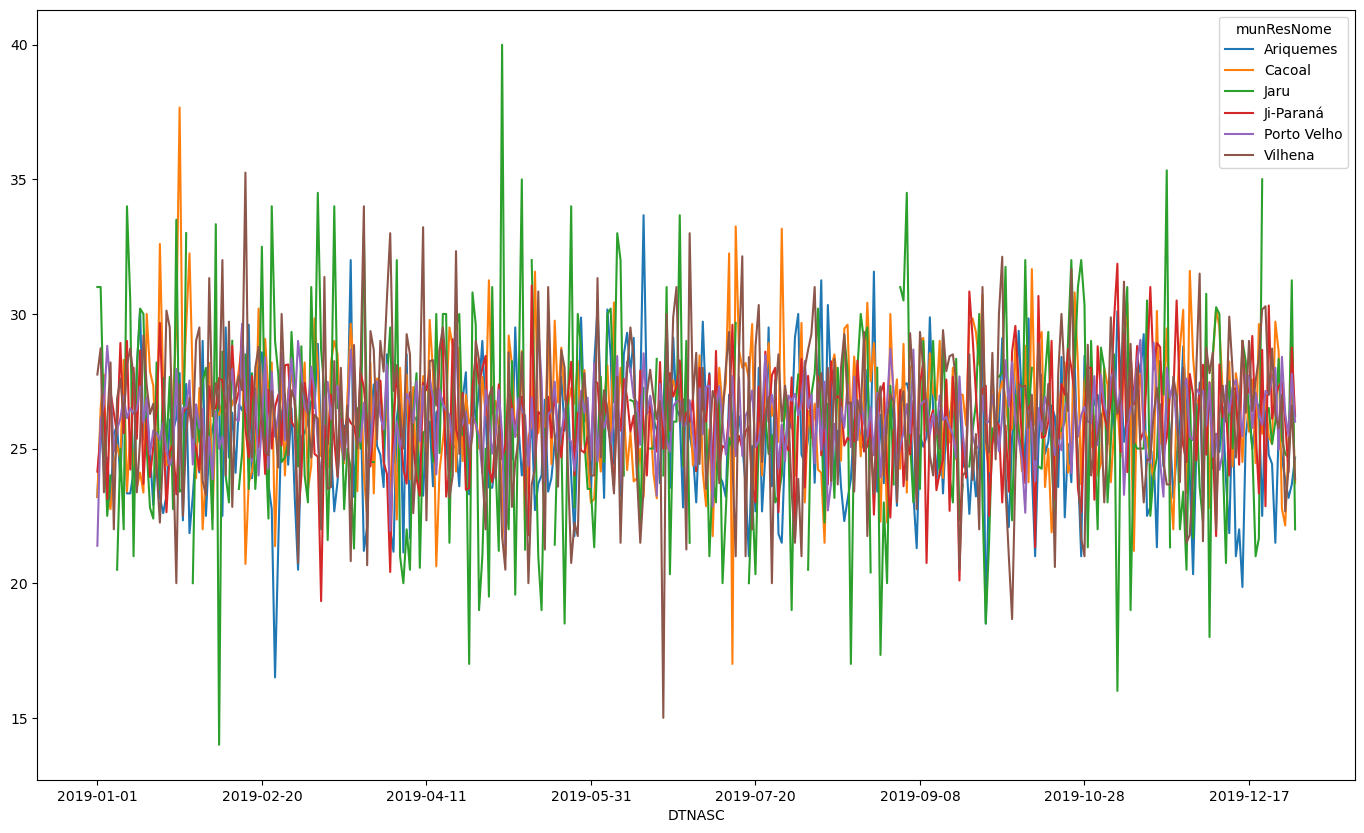

In [242]:
sinasc_4.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack().plot(figsize=[17,10]);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [243]:
sinasc_5 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'PESO']]

In [244]:
sinasc_5 = sinasc_5.set_index('munResNome')

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [245]:
idh = {
    "Porto Velho": "Alto",
    "Vilhena": "Alto",
    "Cacoal": "Alto",
    "Ji-Paraná": "Alto",
    "Pimenta Bueno": "Alto",
    "Ariquemes": "Alto",
    "Rolim de Moura": "Alto",
    "Cerejeiras": "Médio",
    "Jaru": "Médio",
    "Colorado do Oeste": "Médio",
    "Ouro Preto do Oeste": "Médio",
    "Espigão d'Oeste": "Médio",
    "Santa Luzia d'Oeste": "Médio",
    "Pimenteiras do Oeste": "Médio",
    "Presidente Médici": "Médio",
    "Castanheiras": "Médio",
    "Guajará-Mirim": "Médio",
    "Chupinguaia": "Médio",
    "Cabixi": "Médio",
    "Candeias do Jamari": "Médio",
    "São Felipe d'Oeste": "Médio",
    "Cacaulândia": "Médio",
    "São Miguel do Guaporé": "Médio",
    "Mirante da Serra": "Médio",
    "Alvorada d'Oeste": "Médio",
    "Teixeirópolis": "Médio",
    "Nova Brasilândia d'Oeste": "Médio",
    "Rio Crespo": "Médio",
    "Primavera de Rondônia": "Médio",
    "Alta Floresta d'Oeste": "Médio",
    "Ministro Andreazza": "Médio",
    "Novo Horizonte do Oeste": "Médio",
    "Vale do Paraíso": "Médio",
    "Alto Paraíso": "Médio",
    "Parecis": "Médio",
    "Buritis": "Médio",
    "Itapuã do Oeste": "Médio",
    "Corumbiara": "Médio",
    "Cujubim": "Médio",
    "Costa Marques": "Médio",
    "São Francisco do Guaporé": "Médio",
    "Urupá": "Médio",
    "Monte Negro": "Médio",
    "Seringueiras": "Baixo",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho d'Oeste": "Baixo",
    "Campo Novo de Rondônia": "Baixo",
    "Alto Alegre dos Parecis": "Baixo",
    "Theobroma": "Baixo",
    "Nova União": "Baixo",
    "Nova Mamoré": "Baixo",
    "Vale do Anari": "Baixo"
}

In [246]:
sinasc_5A = sinasc_5.groupby(idh).agg([
    ('Mínimo', np.min), ('Média', np.mean), 
    ('Mediana', np.median), ('Máximo', np.max)]
)
sinasc_5A

IDADEMAE                           IDADEPAI                     \
             Mínimo      Média Mediana Máximo   Mínimo      Média Mediana   
munResNome                                                                  
Alto             12  26.280332    26.0     47     15.0  31.074091    30.0   
Baixo            13  25.269231    25.0     46     16.0  30.402332    30.0   
Médio            11  25.848191    25.0     53     16.0  31.570029    31.0   

                  QTDFILVIVO                          QTDFILMORT            \
           Máximo     Mínimo     Média Mediana Máximo     Mínimo     Média   
munResNome                                                                   
Alto         70.0        0.0  1.033960     1.0   12.0        0.0  0.272297   
Baixo        58.0        0.0  1.056270     1.0    8.0        0.0  0.253521   
Médio        73.0        0.0  1.093111     1.0   14.0        0.0  0.272386   

                            PESO                              
           Mediana Máximo Mínimo        Média Mediana Máximo  
munResNome                                                    
Alto           0.0   28.0    292  3245.623791  3275.0   5720  
Baixo          0.0    6.0    730  3244.309955  3255.0   4785  
Médio          0.0    7.0    258  3245.670333  3270.0   5190

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [247]:
ifdm = {
    "Ariquemes": "Moderado",
    "Vilhena": "Moderado",
    "Pimenta Bueno": "Moderado",
    "Porto Velho": "Moderado",
    "Ji-Paraná": "Moderado",
    "Cacoal": "Moderado",
    "Santa Luzia d'Oeste": "Moderado",
    "Rolim de Moura": "Moderado",
    "Chupinguaia": "Moderado",
    "São Miguel do Guaporé": "Moderado",
    "Pimenteiras do Oeste": "Moderado",
    "Teixeirópolis": "Moderado",
    "Colorado do Oeste": "Moderado",
    "Jaru": "Moderado",
    "Rio Crespo": "Moderado",
    "Primavera de Rondônia": "Moderado",
    "Alta Floresta d'Oeste": "Moderado",
    "Ouro Preto do Oeste": "Moderado",
    "São Francisco do Guaporé": "Moderado",
    "Candeias do Jamari": "Moderado",
    "Buritis": "Moderado",
    "São Felipe d'Oeste": "Moderado",
    "Presidente Médici": "Moderado",
    "Cerejeiras": "Moderado",
    "Monte Negro": "Moderado",
    "Urupá": "Moderado",
    "Espigão d'Oeste": "Regular",
    "Seringueiras": "Regular",
    "Alvorada d'Oeste": "Regular",
    "Itapuã do Oeste": "Regular",
    "Cabixi": "Regular",
    "Novo Horizonte do Oeste": "Regular",
    "Nova Brasilândia d'Oeste": "Regular",
    "Vale do Paraíso": "Regular",
    "Corumbiara": "Regular",
    "Alto Paraíso": "Regular",
    "Cacaulândia": "Regular",
    "Vale do Anari": "Regular",
    "Ministro Andreazza": "Regular",
    "Costa Marques": "Regular",
    "Nova União": "Regular",
    "Guajará-Mirim": "Regular",
    "Mirante da Serra": "Regular",
    "Parecis": "Regular",
    "Castanheiras": "Regular",
    "Theobroma": "Regular",
    "Machadinho d'Oeste": "Regular",
    "Campo Novo de Rondônia": "Regular",
    "Nova Mamoré": "Regular",
    "Cujubim": "Regular",
    "Alto Alegre dos Parecis": "Regular",
    "Governador Jorge Teixeira": "Regular"
}

In [248]:
sinasc_5B = sinasc_5.groupby(ifdm).agg([
    ('Mínimo', np.min), ('Média', np.mean), 
    ('Mediana', np.median), ('Máximo', np.max)]
)
sinasc_5B

IDADEMAE                           IDADEPAI                     \
             Mínimo      Média Mediana Máximo   Mínimo      Média Mediana   
munResNome                                                                  
Moderado         12  26.226921    26.0     53     15.0  31.145206    30.0   
Regular          11  25.412005    25.0     52     16.0  31.345297    30.0   

                  QTDFILVIVO                          QTDFILMORT            \
           Máximo     Mínimo     Média Mediana Máximo     Mínimo     Média   
munResNome                                                                   
Moderado     70.0        0.0  1.030350     1.0   12.0        0.0  0.272476   
Regular      73.0        0.0  1.172404     1.0   14.0        0.0  0.264967   

                            PESO                              
           Mediana Máximo Mínimo        Média Mediana Máximo  
munResNome                                                    
Moderado       0.0   28.0    258  3243.947354  3275.0   5720  
Regular        0.0    7.0    425  3255.036835  3275.0   5070

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [249]:
pib = {
    "Porto Velho": "Acima 1 Bi",
    "Ji-Paraná": "Acima 1 Bi",
    "Vilhena": "Acima 1 Bi",
    "Ariquemes": "Acima 1 Bi",
    "Cacoal": "Acima 1 Bi",
    "Jaru": "Acima 1 Bi",
    "Rolim de Moura": "Acima 1 Bi",
    "Pimenta Bueno": "Acima 1 Bi",
    "Guajará-Mirim": "Entre 500 Mi e 1 Bi",
    "Ouro Preto do Oeste": "Entre 500 Mi e 1 Bi",
    "Buritis": "Entre 500 Mi e 1 Bi",
    "Machadinho do Oeste": "Entre 500 Mi e 1 Bi",
    "Espigão d'Oeste": "Entre 500 Mi e 1 Bi",
    "São Miguel do Guaporé": "Entre 500 Mi e 1 Bi",
    "Candeias do Jamari": "Entre 500 Mi e 1 Bi",
    "Nova Mamoré": "Entre 500 Mi e 1 Bi",
    "Cerejeiras": "Entre 500 Mi e 1 Bi",
    "Alta Floresta do Oeste": "Entre 300 Mi e 500 Mi",
    "Presidente Médici": "Entre 300 Mi e 500 Mi",
    "Cujubim": "Entre 300 Mi e 500 Mi",
    "Nova Brasilândia do Oeste": "Entre 300 Mi e 500 Mi",
    "Alto Paraíso": "Entre 300 Mi e 500 Mi",
    "São Francisco do Guaporé": "Entre 300 Mi e 500 Mi",
    "Colorado do Oeste": "Entre 300 Mi e 500 Mi",
    "Monte Negro": "Entre 200 Mi e 300 Mi",
    "Alto Alegre dos Parecis": "Entre 200 Mi e 300 Mi",
    "Campo Novo de Rondônia": "Entre 200 Mi e 300 Mi",
    "Alvorada do Oeste": "Entre 200 Mi e 300 Mi",
    "Chupinguaia": "Entre 100 Mi e 200 Mi ",
    "Corumbiara": "Entre 100 Mi e 200 Mi ",
    "Ministro Andreazza": "Entre 100 Mi e 200 Mi ",
    "Urupá": "Entre 100 Mi e 200 Mi ",
    "Costa Marques": "Entre 100 Mi e 200 Mi ",
    "Seringueiras": "Entre 100 Mi e 200 Mi ",
    "Mirante da Serra": "Entre 100 Mi e 200 Mi ",
    "Governador Jorge Teixeira": "Entre 100 Mi e 200 Mi ",
    "Theobroma": "Entre 100 Mi e 200 Mi ",
    "Santa Luzia do Oeste": "Entre 100 Mi e 200 Mi ",
    "Novo Horizonte do Oeste": "Entre 100 Mi e 200 Mi ",
    "Itapuã do Oeste": "Entre 100 Mi e 200 Mi ",
    "Vale do Paraíso": "Entre 100 Mi e 200 Mi ",
    "Cacaulândia": "Entre 100 Mi e 200 Mi ",
    "Cabixi": "Entre 100 Mi e 200 Mi ",
    "Vale do Anari": "Entre 100 Mi e 200 Mi ",
    "Nova União": "Até 100 Mi",
    "Parecis": "Até 100 Mi",
    "Rio Crespo": "Até 100 Mi",
    "Pimenteiras do Oeste": "Até 100 Mi",
    "Teixeirópolis": "Até 100 Mi",
    "São Felipe do Oeste": "Até 100 Mi",
    "Castanheiras": "Até 100 Mi",
    "Primavera de Rondônia": "Até 100 Mi"
}

In [250]:
sinasc_5C = sinasc_5.groupby(pib).agg([
    ('Mínimo', np.min), ('Média', np.mean), 
    ('Mediana', np.median), ('Máximo', np.max)]
)
sinasc_5C

IDADEMAE                           IDADEPAI             \
                         Mínimo      Média Mediana Máximo   Mínimo      Média   
munResNome                                                                      
Acima 1 Bi                   12  26.265562    26.0     47     15.0  31.108387   
Até 100 Mi                   14  26.519894    26.0     41     17.0  31.626126   
Entre 100 Mi e 200 Mi        12  25.638424    25.0     52     17.0  31.744348   
Entre 200 Mi e 300 Mi        13  25.146435    25.0     41     16.0  30.187500   
Entre 300 Mi e 500 Mi        11  25.706070    25.0     47     16.0  30.819149   
Entre 500 Mi e 1 Bi          13  25.785927    25.0     53     17.0  31.381955   

                                      QTDFILVIVO                           \
                       Mediana Máximo     Mínimo     Média Mediana Máximo   
munResNome                                                                  
Acima 1 Bi                30.0   70.0        0.0  1.026435     1.0   12.0   
Até 100 Mi                30.0   67.0        0.0  1.032258     1.0    6.0   
Entre 100 Mi e 200 Mi     31.0   73.0        0.0  0.992320     1.0   14.0   
Entre 200 Mi e 300 Mi     29.0   55.0        0.0  1.010526     1.0    7.0   
Entre 300 Mi e 500 Mi     30.0   64.0        0.0  1.062097     1.0    8.0   
Entre 500 Mi e 1 Bi       31.0   60.0        0.0  1.228385     1.0   11.0   

                       QTDFILMORT                            PESO  \
                           Mínimo     Média Mediana Máximo Mínimo   
munResNome                                                          
Acima 1 Bi                    0.0  0.270229     0.0   28.0    292   
Até 100 Mi                    0.0  0.172507     0.0    2.0    320   
Entre 100 Mi e 200 Mi         0.0  0.239824     0.0    6.0    425   
Entre 200 Mi e 300 Mi         0.0  0.263982     0.0    4.0    930   
Entre 300 Mi e 500 Mi         0.0  0.251828     0.0    5.0    258   
Entre 500 Mi e 1 Bi           0.0  0.319958     0.0    7.0    285   

                                                    
                              Média Mediana Máximo  
munResNome                                          
Acima 1 Bi              3247.215719  3275.0   5720  
Até 100 Mi              3197.679045  3210.0   4505  
Entre 100 Mi e 200 Mi   3250.392337  3265.0   4810  
Entre 200 Mi e 300 Mi   3233.701349  3260.0   4680  
Entre 300 Mi e 500 Mi   3240.387380  3290.0   4888  
Entre 500 Mi e 1 Bi     3243.336315  3270.0   5135

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- A análise das quantidades de partos normais e cesáreas no ano de 2019 pelas regiões de Rondônia definidas pela latitude mostrou que o parto normal é dominante em municípios de latitude maior do que -10.5. Nos muncípios de latidude inferior a -10.5, a cesárea é mais frequente. Além disso, o total de partos é maior nos municípios de latitude superior a -10.5.

- A divisão dos municípios de acordo com suas áreas quase não apresentou diferenças em relação às idades dos pais e mães. A única notável foi a idade máxima dos pais, sendo 86 anos em municípios de áreas superiores a 30000 e 69 anos nos inferiores a 30000.

- Tanto a quantidade de filhos vivos quanto a de mortos são maiores em municípios de baixas altitudes (entre 84.49 e 289.0). Nessas altitudes, a porcentagem de filhos vivos corresponde a 91.3% do total; enquanto que no caso de filhos mortos, a porcentagem é de 91.1%. 

- O gráfico temporal da média das idades das mães de cada região imediata apresentou maiores picos entre janeiro e fevereiro na região de Cacoal (próximo a 37 anos) e entre os meses março e abril na região de Jaru (aproximadamente 40 anos). As menores médias ocorreram durante fevereiro na região de Jaru, sendo abaixo de 15 anos, e no mês junho na região Porto Velho (em torno de 15 anos).

- Os dados sobre a idade da mãe, idade do pai, quantidade de filhos vivos, quantidade de filhos mortos e peso do bebê não apresentaram diferenças significativas quando analisados de acordo com o PIB, IDH e IFDM dos municípios.